# THE MNIST DATABASE of handwritten digits

All data came from [MNIST](http://yann.lecun.com/exdb/mnist/)

The MNIST training set is composed of 30,000 patterns from SD-3 and 30,000 patterns from SD-1. Our test set was composed of 5,000 patterns from SD-3 and 5,000 patterns from SD-1. The 60,000 pattern training set contained examples from approximately 250 writers. We made sure that the sets of writers of the training set and test set were disjoint.

SD-1 contains 58,527 digit images written by 500 different writers. In contrast to SD-3, where blocks of data from each writer appeared in sequence, the data in SD-1 is scrambled. Writer identities for SD-1 is available and we used this information to unscramble the writers. We then split SD-1 in two: characters written by the first 250 writers went into our new training set. The remaining 250 writers were placed in our test set. Thus we had two sets with nearly 30,000 examples each. The new training set was completed with enough examples from SD-3, starting at pattern # 0, to make a full set of 60,000 training patterns. Similarly, the new test set was completed with SD-3 examples starting at pattern # 35,000 to make a full set with 60,000 test patterns. Only a subset of 10,000 test images (5,000 from SD-1 and 5,000 from SD-3) is available on this site. The full 60,000 sample training set is available.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Dataset.mnistReader as mnist
import random
import NNetWork.Layers as nn
import NNetWork.Variables as uvar
from NNetWork.util import getBatch
from NNetWork.Optim import Adam

from NNetWork.LossFunc import softMax

# trainData = mnist.read_train_data() # 60000 images
# taskData = mnist.read_task_data() # 10000 images

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = (20, 20)

# magic!!
%matplotlib inline

ModuleNotFoundError: No module named 'NNetWork.util'

## Show the MNIST Data

In [9]:
def showMNISTData(imgs, labs):
    """
    show 10 datas
    the data is the shape of (imgs, labels)
    """
    N, W, H = imgs.shape
    n = np.ceil(np.sqrt(N))
    for i in range(N):
        plt.subplot(n, n, i+1)
        plt.imshow(imgs[i])
        plt.title('%d'%labs[i])
        plt.gca().axis('off')
    plt.show()    

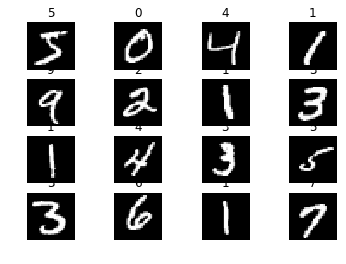

In [12]:
X_train, Y_train = trainData
X_task, Y_task = taskData
showMNISTData(X_train[0:16], Y_train[0:16])

## Create the model

In [4]:
model = nn.Serial(
    nn.Reshape(-1,28*28),
    nn.Linear(28*28,340),
    nn.ReLU(),
    nn.Linear(340,10)
)

model.load("anotherMNIST.model")

optim = Adam(model.parameters(), lr=1e-2)
X = uvar.BaseVar(data=X_task)
Y = uvar.BaseVar(data=Y_task)

## Train The model

runing 0 loss 118117.96157324093
runing 10 loss 7999.333392935725
runing 20 loss 3353.4235416892907
runing 30 loss 1983.000780322076
runing 40 loss 1222.8921718132588
runing 50 loss 785.6509563785356
runing 60 loss 512.4995240336273
runing 70 loss 321.991274538251
runing 80 loss 191.31792480054673
runing 90 loss 108.90450644712112


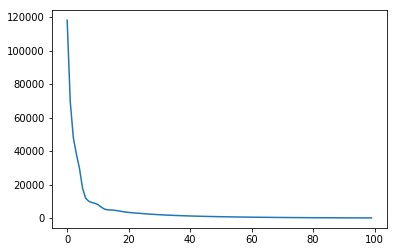

In [7]:
loss_hist = []
# %debug
for i in range(100):
    loss = 0
    for x, y in getBatch(X, Y, 5000):
        out = model.forward(x)
        loss += softMax(out,y)
        model.backward(out)
        optim.step()
    if i % 10 == 0:
        print("runing",i, "loss", loss)
    loss_hist.append(loss)
    
plt.plot(loss_hist)
plt.show()

## The accuricy

In [ ]:
model.save("anotherMNIST.model")

0.91


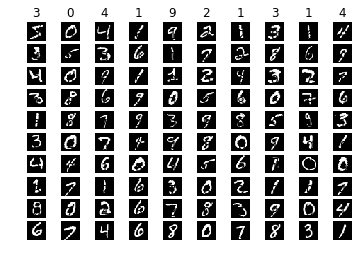

In [11]:
accx = uvar.BaseVar(X_train)[0:100]
acco = model.forward(accx)
accy = acco.argmax(axis=1)
# print(accy)
acc = np.sum(accy.data == Y_train[0:100]) / 100
print(acc)
showMNISTData(np.reshape(accx.data, (-1,28,28)), accy.data)

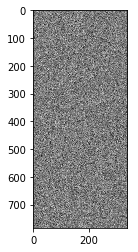

[47.40670697 46.4870865  46.19792657 46.10213323 45.55196405 45.09608711
 44.83909835 44.65392578 44.4970765  44.16995358 43.80564653 43.7484849
 43.49455514 43.15899198 43.08657604 42.99405098 42.75046011 42.6526731
 42.42112855 42.18661291 41.96716626 41.87710042 41.63132171 41.49682585
 41.43507112 41.28569807 41.11064834 40.8834729  40.78793522 40.72888939
 40.5945656  40.39504504 40.29635116 40.19686814 39.97392966 39.84946813
 39.74536697 39.6283147  39.51285441 39.4541439  39.29084063 39.19733431
 39.13191219 38.84856819 38.70357505 38.63149824 38.39801587 38.33075552
 38.16878304 38.0407816  37.8990008  37.78570571 37.7303034  37.65319507
 37.39327658 37.27440188 37.25602261 37.05868444 37.01531619 36.8397542
 36.63340238 36.56146535 36.54716712 36.36689723 36.26883191 36.24859543
 36.18214234 36.0267132  35.8674336  35.77338788 35.54942437 35.48735677
 35.44197511 35.35720581 35.23265501 35.05622321 34.95602664 34.87690505
 34.69558437 34.60040933 34.54412112 34.35388085 34.30

In [7]:
l1 = model.nns[1]
w = l1.w.data
b = l1.b.data
plt.imshow(w)
plt.show()

u,s,vh = np.linalg.svd(w)
# print(s)

In [26]:
model2 = nn.Serial(
    nn.Linear(28*28,7),
    nn.Linear(7,340),
    nn.ReLU(),
    nn.Linear(340,10)
)

model2.load("anotherMNIST2.model")

optim = Adam(model2.parameters(), lr=1e-4)
X = uvar.BaseVar(data=np.reshape(X_task, (-1, 28*28)))
Y = uvar.BaseVar(data=Y_task)

runing 0 loss 4.88755950112127
runing 10 loss 1.2795845995567026
runing 20 loss 0.9371345958271502
runing 30 loss 0.8138113264837545
runing 40 loss 0.7450527862056451
runing 50 loss 0.7213205291023618
runing 60 loss 0.6587343890943956
runing 70 loss 0.6277436780339632
runing 80 loss 0.5693925184996086
runing 90 loss 0.5195822859508195


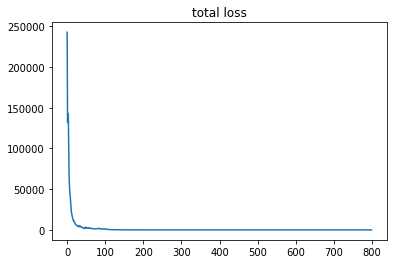

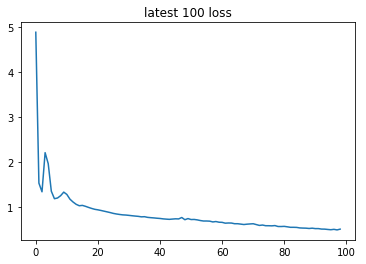

In [27]:
# loss_hist = []
# %debug
for i in range(100):
    loss = 0
    for x, y in getBatch(X, Y, 5000):
        out = model2.forward(x)
        loss += softMax(out,y)
        model2.backward(out)
        optim.step()
    if i % 10 == 0:
        print("runing",i, "loss", loss)
    loss_hist.append(loss)

model2.save("anotherMNIST2.model")

plt.figure()
plt.plot(loss_hist)
plt.title("total loss")
plt.figure()
plt.plot(loss_hist[-100:-1])
plt.title("latest 100 loss")
plt.show()

0.79


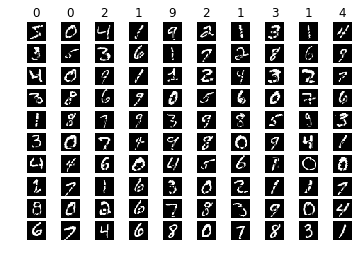

In [28]:
accx = uvar.BaseVar(np.reshape(X_train, (-1,28*28)))[0:100]
acco = model2.forward(accx)
accy = acco.argmax(axis=1)
# print(accy)
acc = np.sum(accy.data == Y_train[0:100]) / 100
print(acc)
showMNISTData(np.reshape(accx.data, (-1,28,28)), accy.data)